In [18]:
import results
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import glob

sns.set(style = "whitegrid", rc = {
   "legend.frameon": False,
    "font.family": "DejaVu Sans",
    "font.sans-serif": "Helvetica",
    "axes.titlesize": 14,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "axes.labelsize": 16,
    'legend.fontsize': 12
})


In [43]:
import torch
import numpy as np


torch.zeros([1, 5], requires_grad=True).backward()

RuntimeError: grad can be implicitly created only for scalar outputs

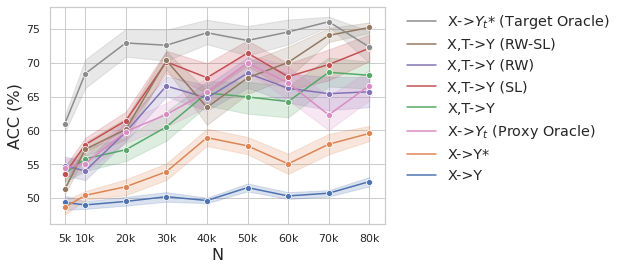

In [19]:
df, meandf  = results.get_erm_convergence_result_df('erm_convergence_rates_no_crossfit_beta3_alpha1_R15')
df['ACC']= df['ACC']*100
df.reset_index(inplace=True)

fig = sns.lineplot(data=df, x="NS", y="ACC", hue='baseline', ci=68, marker='o')
fig.set_xlabel('N')
fig.set_ylabel('ACC (%)')

handles, labels = plt.gca().get_legend_handles_labels()

disp_names = {
    'Target Oracle': 'X->$Y_t$* (Target Oracle)',
    'RW-SL': 'X,T->Y (RW-SL)',
    'COM-SL': 'X,T->Y (SL)',
    'COM': 'X,T->Y',
    'RW': 'X,T->Y (RW)',
    'Proxy Oracle': 'X->$Y_t$ (Proxy Oracle)',
    'OBS Oracle': 'X->Y*',
    'OBS': 'X->Y'
}
order = [7,5,4,3,2,6,1,0]
plt.legend([handles[idx] for idx in order],[disp_names[labels[idx]] for idx in order],
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='large')

fig.set_xticks([5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000], labels=['5k', '10k', '20k', '30k', '40k', '50k', '60k', '70k', '80k'])


In [27]:
df['alpha_error'] = df['alpha_0'] - df['alpha_0_hat']

df['beta_error'] = df['beta_0'] - df['beta_0_hat']

In [31]:
df.groupby(['baseline', 'NS']).mean().to_csv('baselines.csv')

In [8]:
results = []
for f in glob.glob(f'results/erm_realdata_crossfit_oracle_params/*TE.csv'):
    results.append(pd.read_csv(f))
nsdf = pd.concat(results)
nsdf.drop(columns=['Unnamed: 0'], inplace=True)

nsdf['ate_error'] = nsdf['ate_hat'] - nsdf['ate']
nsdf['param'] = "(" + nsdf['alpha_0'].astype(str)+"," +nsdf['beta_0'].astype(str) + ")"

jobs = nsdf[nsdf['benchmark'] == 'jobs']
ohie = nsdf[nsdf['benchmark'] == 'ohie']
jobs = jobs.sort_values('alpha_0', ascending=False).reset_index(drop=True)
ohie = ohie.sort_values('alpha_0', ascending=False).reset_index(drop=True)

In [9]:
def plot_experimental_data_results(df, metric):
    plt.figure(figsize=(12, 6))
    g = sns.barplot(data=df, x='baseline', y=metric, hue='param', ci=68, errwidth=2, capsize=.05)
    plt.xlabel("")
    
    ylabel = "ATE error" if metric == "ate_error" else "Policy Risk"
    
    plt.ylabel(ylabel)
    plt.legend( title=r"         ($\alpha, \beta$)")
#     models = ['X -> Y', 'X,T->Y (RW-SL)', 'X->$Y_t$* (Target Oracle)','X->Y*', 'X,T->Y', 'X,T->Y (SL)', 'X,T->Y (RW)', 'X->$Y_t$ (Proxy Oracle)']
#     g.set_xticks(range(len(models)), models, size=12)
#     plt.xticks(rotation=45)
    


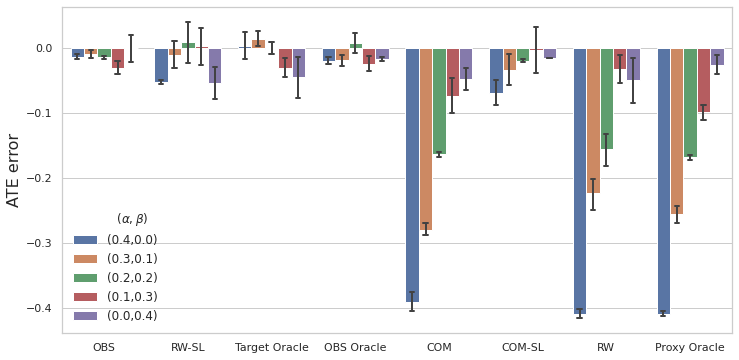

In [10]:
plot_experimental_data_results(ohie, 'ate_error')

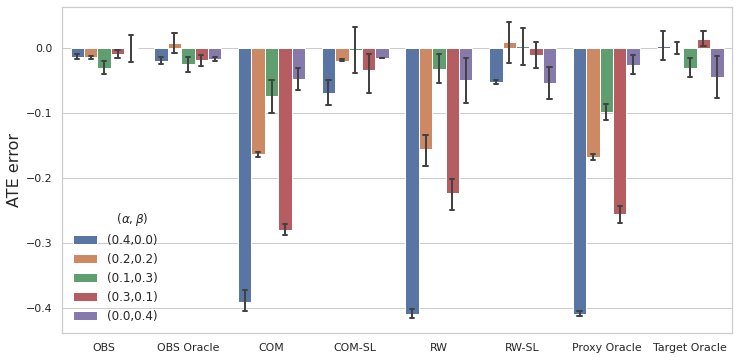

In [187]:
plot_experimental_data_results(ohie, 'ate_error')

Text(0, 0.5, 'Policy risk')

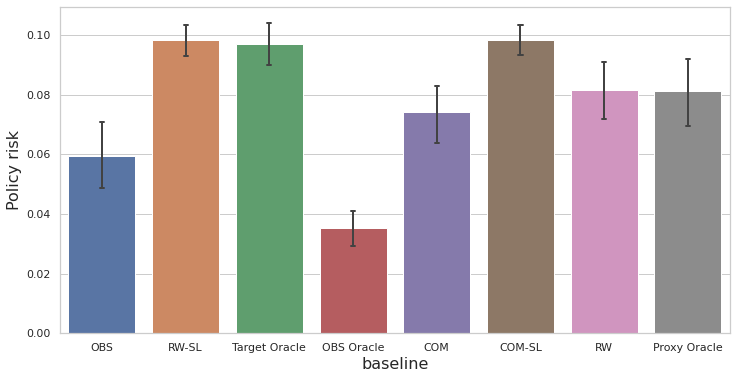

In [15]:
plt.figure(figsize=(12, 6))
g = sns.barplot(data=jobs, x='baseline', y="policy_risk", ci=68, errwidth=2, capsize=.05)

plt.ylabel("Policy risk")
